### Gelişmiş Analizler
##### Eksik Verinin Yapısını İncelemek

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt

In [4]:
def load():
    data = pd.read_csv("titanic.csv")
    return data

df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


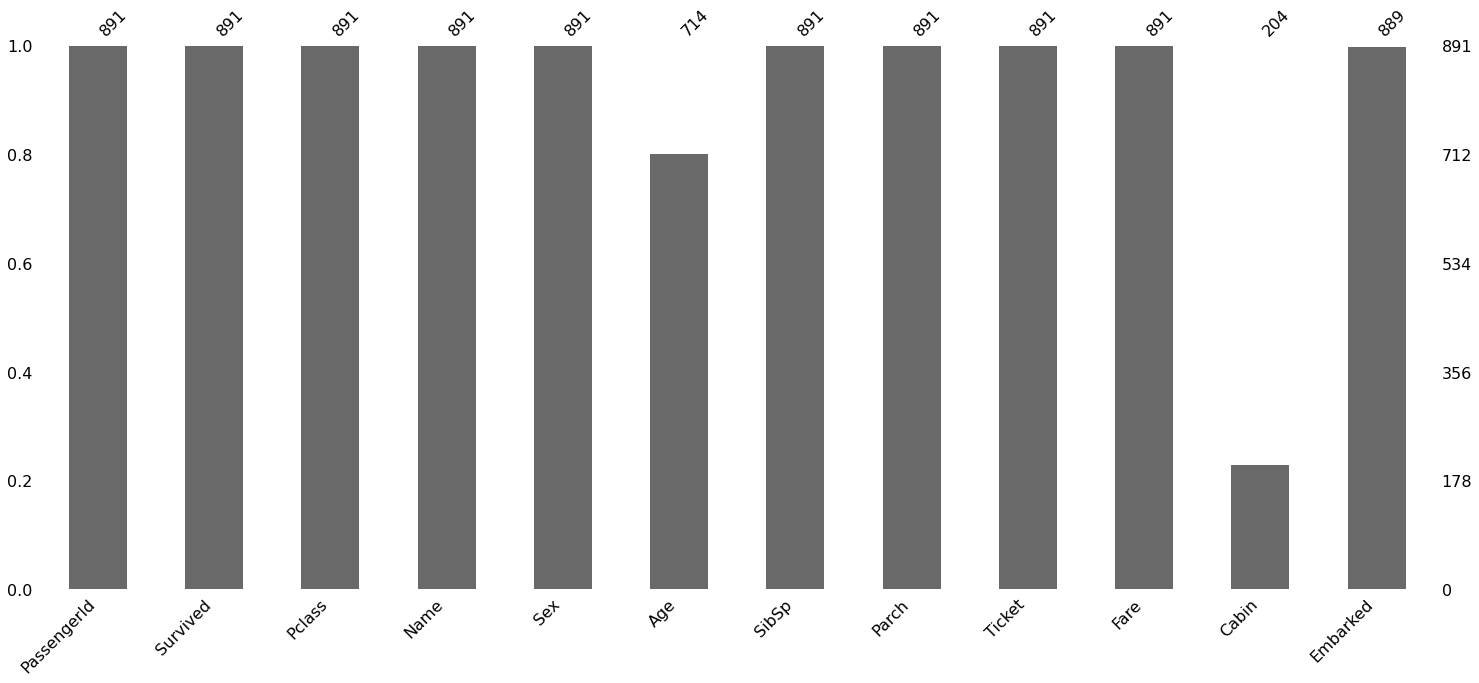

In [7]:
# bar:İlgili veri setindeki değişkenlerdeki tam sayıları göstermektedir.
msno.bar(df)
plt.show()

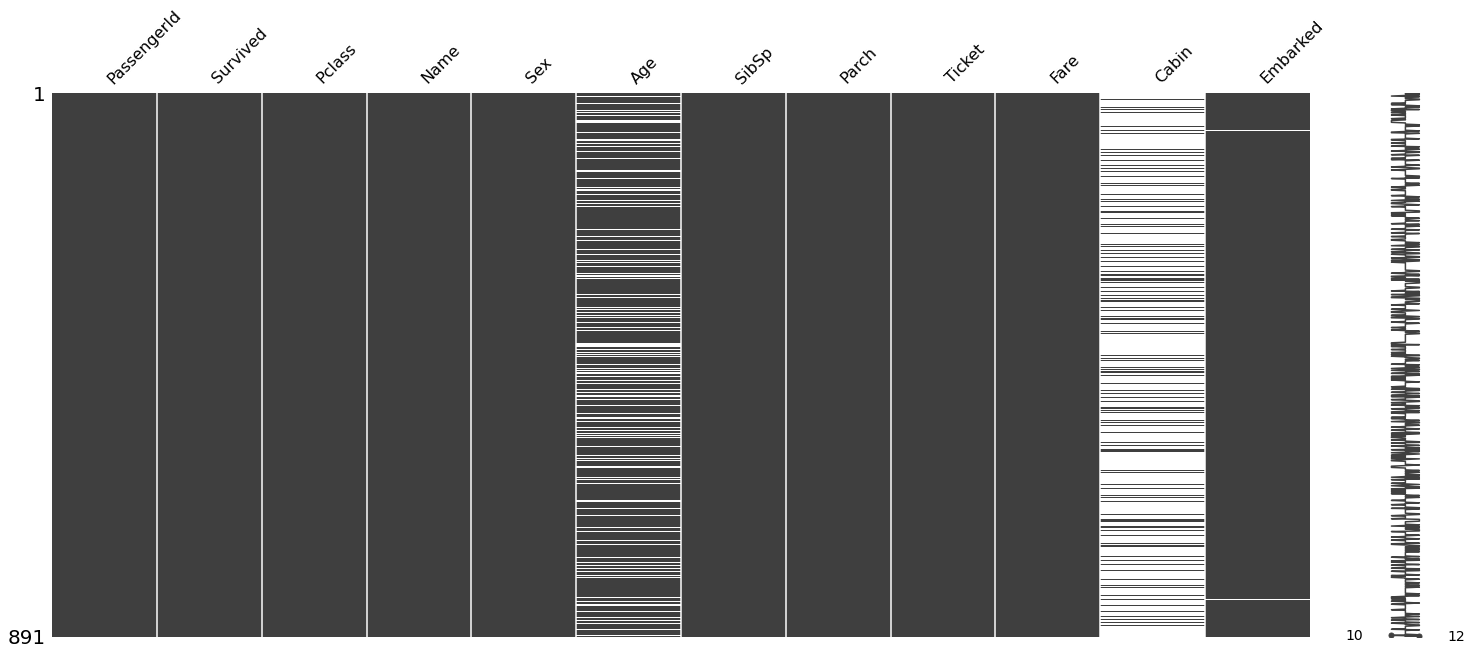

In [8]:
# Bahsettiğimiz değişkenlerdeki eksikliklerin bir araya çıkıp çıkmama durumunu incelemek için kullanılan görsel bir araçtır. 
# Burada eğer değişkenlerdeki eksiklikler bir arada meydana geliyorsa bu durumda örneğin burada bazı beyazlıklar varsa diğer 
# değişkende de benzer noktalarda beyazlıklar olur. Buralarda bazı dolu noktalar varsa ilgili eksikliği birlikte sergilediği 
# değişkende de doluluk olur. 
# Kısaca bu grafik yöntem değişkenlerdeki eksikliklerin birlikte çıkıp çıkmadığıyla ilgili bilgi verir.
msno.matrix(df)
plt.show()

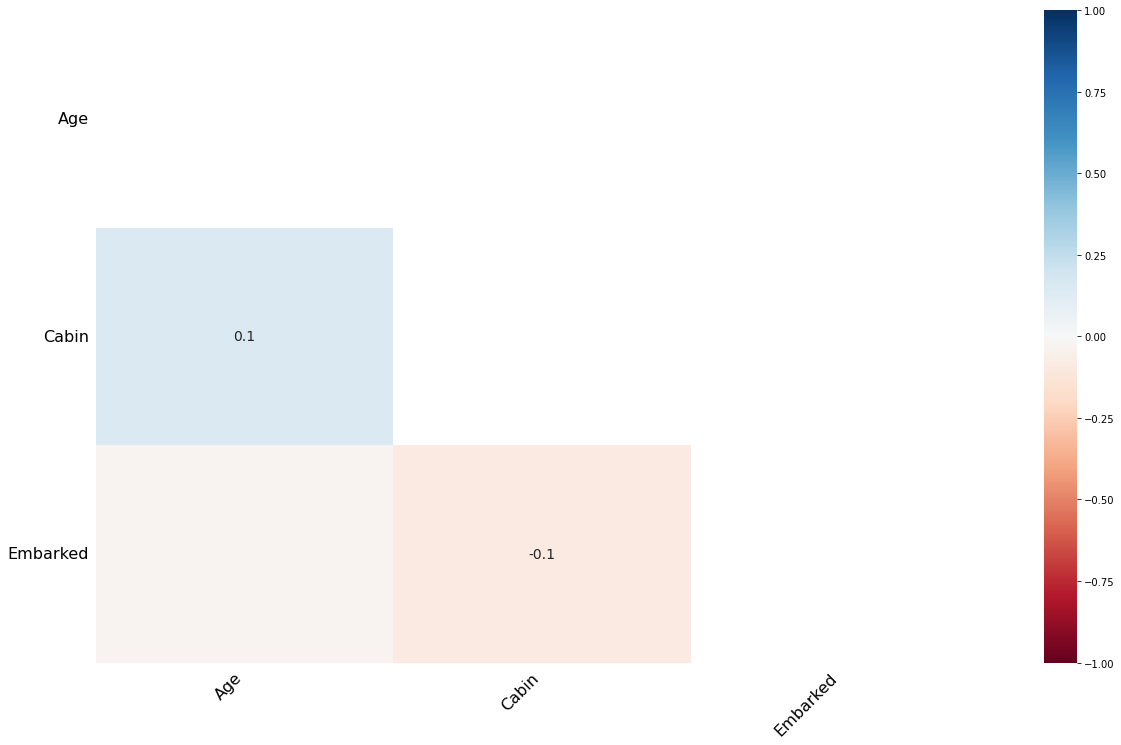

In [10]:
# heatmap: Eksiklikler üzerine kurulu bir ısı haritasıdır. Bu ısı haritasının bize sunacak olduğu şey nullity correlation 
# değerleridir. Çok değerlidir.
# DİKKAT: Neyle ilgileniyorduk? Eksik değerlerin belirli bir korelasyonla ortaya çıkıp çıkmadığı durumuyla yani eksik değerlerin
# rassallığı ile ilgileniyorduk. Eğer bir değişkende eksiklik varken diğer değişkende de eksiklik varsa yani bu eksiklikler 
# acaba birlikte mi oluşuyor gibi bir durumu incelemek istiyorduk. Fakat burada iki senaryo var eksikliklerin birlikte çıkması 
# senaryosu ve eksikliklerin belirli bir değişkene bağımlı olarak çıkması senaryosu... İkisi de aslında bağımlılık durumudur 
# ama aralarında ufak bir fark var. Kredi kartı örneğindeki kredi kartı olup olmamayı ifade eden değişkende kredi kartı yok dolu 
# değil dolu bu değer mesela, kredi kartı yok olanlarda aylık ortalama kredi kartı harcaması değişkenşnde eksiklikler olduğunu 
# gördüğümüzde bu da bir bağımlılıktır. Örnek iki değişken var ve sürekli birlikte eksiliyorlar, bu da bir bağımlılıktır. Peki 
# bu yorumlardan sonra buradaki eksiklik korelasyonuyla ilgili bşr yorum var mı bunu değerlendirelim. Sağ tarafta görülen palet
# -1 ile +1 arasında değişmektedir. Bir korelasyon ifadesidir. +1' e yakın olması pozitif yönlü kuvvetli ilişkiyi -1'e yakın 
# olması negatif yönlü kuvvetli ilişkiyi ifade eder. Pozitif yönlü kuvvetli ilişki olması durumunda değişkenlerdeki 
# eksikliklerin birlikte ortaya çıktığı düşünülür. Yani birisinde eksiklik varken diğerinde de vardır. Birisinde yokken 
# diğerinde de yoktur. Pozitif yönlü bir ilişki vardır. Eğer -1 civarına yakınsa yani negatif korelasyon varsa bu durumda 
# birisinde varken diğerinde yok birisinde yokken diğerinde var şeklinde ters bir ilişki vardır. Peki bizim senaryomuzda durum 
# nasıl? Mesela cabin değişkeni ile yaş değişkeni arasındaki eksiklik korelasyonuna bakın 0.1 yani anlamsız bir korelasyon 
# benzer şekilde embarked ile cabin değişkenleri arasında da anlamsız bir korelasyon vardır. Dolayısıyla buradan hareketle bizim 
# veri setimiz için diyoruz ki burada nullity correlation'lar anlamlı gibi gözükmüyor. Eeee anlamlı gibi nasıl değerlendiririz 
# bunu? Eğer bu hesaplanacak olan değerler mesela %60'ın üzerinde 75 80 90 gibi değerler çıksaydı bu durumda bu değişikliklerin/
# eksikliklerin birlikte ortaya çıkabileceğinden şüphelenirdik. Eee bunu ne yapardık, analiz ediyoruz şu an... Göz önünde 
# bulundurup mesela ilgili değişkenlere gidip gerçekten bu problem acaba neden ortaya çıkmış diye değerlendirebilirdik ya da 
# hiçbir şey de yapmayabilirdik. Sadece analiz edip anlamaya çalışıyoruz.
msno.heatmap(df)
plt.show()